5 Regression on real dataset: air pollution mapping
-------------------

The power of *machine learning* for **regression** can only be manifested by its application to real dataset. For instance, you will never know why the **Random Forest** is such a popular algorithm and how it outperforms the other approaches.

In this challenge, you are going to work with GIS point dataset, where air pollutant NO<sub>2</sub> and some potential predictors (indicators) are provided. While acquiring point measurement of NO<sub>2</sub> at each station, indicators such as road length and population size within a buffer of the station is also obtained. Specifically you will have weekday daytime and nighttime NO<sub>2</sub> point measurements at several stations (point). Road length and population size around each station (point) is indicated with the buffer size. For instance, 'populaiton_3000m' means population size within the 3000m buffer zone around each stations (point).

You will work with famous 'pandas' module to handle table based dataset. You will also try to learn how to study the functionality of the module by exploring online open source documentation.



In [2]:
%matplotlib inline  # Again, we need to inform this notebook to plot figures in lines, you can ignore this code

UsageError: unrecognized arguments: # Again, we need to inform this notebook to plot figures in lines, you can ignore this code


In [73]:
# Also, before reading the data you need to first clone the data on Github to our Colab workspace
!git clone https://github.com/jonwangio/uu_ml/tree/main/data

fatal: destination path 'data' already exists and is not an empty directory.


### 5.0 Data and preprocessing

In [3]:
# The first thing you need to do is to import the 'pandas' module

import pandas as pd

# You can be able to read *.csv based GIS point dataset by using 'pandas'
data_all = pd.read_csv('data/no2.csv')  # 'Programming-Basics/data/no2.csv'
# Print(data_no2)
data_all.head(5)  # What does this mean?

,Point,Longitude,Latitude,weekday_daytime_no2,weekday_nighttime_no2,population_1000m,population_3000m,population_5000m,roadlength_1000m,roadlength_3000m,roadlength_5000m
0,1,3.749458,51.295278,15.486447,16.807046,440.064819,3312.588867,8206.84375,0.00000,28314.40625,60863.47656
1,2,3.916947,51.635556,14.697327,16.898273,492.458710,3886.029297,5170.12207,5352.03125,62689.73828,75216.85156
2,3,4.121389,51.978056,28.577064,30.600098,3102.089111,23252.750000,61342.87891,12614.07422,38824.15234,77248.41406
3,4,4.227778,51.931944,31.335268,33.090708,6142.983398,36911.640630,79492.71094,13942.57422,82291.88281,164851.23440
4,5,4.289172,52.078056,23.677740,26.016235,19552.472660,152638.750000,322745.00000,60375.49609,440915.18750,903282.81250


In [4]:
# Pandas dataframe allows overview of the variable names or the names of the columns
data_all.columns

Index(['Point', 'Longitude', 'Latitude', 'weekday_daytime_no2',
       'weekday_nighttime_no2', 'population_1000m', 'population_3000m',
       'population_5000m', 'roadlength_1000m', 'roadlength_3000m',
       'roadlength_5000m'],
      dtype='object')

In [55]:
# Extract the daytime NO2 data as a column
# Try to figure out what does the data type mean?

daytime_no2 = data_all['weekday_daytime_no2']

# You can further extract the values of the pandas column as Numpy array. Handy!

no2_val = daytime_no2.values
print(no2_val.shape)

(482,)


In [56]:
# Or you can extract values from multiple columns
variables = data_all.iloc[:,5:].values

print(variables[:5,:])  # Visualize the first 5 rows of the data

[[4.40064819e+02 3.31258887e+03 8.20684375e+03 0.00000000e+00
  2.83144062e+04 6.08634766e+04]
 [4.92458710e+02 3.88602930e+03 5.17012207e+03 5.35203125e+03
  6.26897383e+04 7.52168516e+04]
 [3.10208911e+03 2.32527500e+04 6.13428789e+04 1.26140742e+04
  3.88241523e+04 7.72484141e+04]
 [6.14298340e+03 3.69116406e+04 7.94927109e+04 1.39425742e+04
  8.22918828e+04 1.64851234e+05]
 [1.95524727e+04 1.52638750e+05 3.22745000e+05 6.03754961e+04
  4.40915188e+05 9.03282812e+05]]


### Short exercise 5.0

Before analyzing the data, it is always good to examine the data visually. There can be already some visible patterns in the data that can help you to make some assumptions and build models.

In [57]:
# A simple way to visualize data is try to plot scatter plots to examine one-by-one how variables correlate to each other.
# Please try to define a function that can help you to visualze 

'''
# Answers and hints
def no2_scatter(name1, name2, data):
    series1 = data[name1]
    series2 = data[name2]
    
    val1 = series1.values
    val2 = series2.values
    
    plt.plot(val1, val2,'o')
    plt.title('scatter of'+name1+name2)
    plt.show()
'''

# Try to call the function to see if it works.

'''
# Answers and hints
no2_scatter('weekday_daytime_no2', 'roadlength_1000m', data_all)
'''

"\n# Answers and hints\nno2_scatter('weekday_daytime_no2', 'roadlength_1000m', data_all)\n"

Please also visualize simple statistics of the input data, such as the probabilistic distribution of the data. For instance, the following codes provide you a hint to examine data in the column *population_1000m*.

In [84]:
from matplotlib import pyplot as plt  # Import module for plotting and visualization
import numpy as np

pop1000 = data_all['population_1000m'].values
print(type(pop1000))
print(np.min(pop1000), np.max(pop1000), np.mean(pop1000), np.std(pop1000))


<class 'numpy.ndarray'>
0.0 20335.24805 6149.919574647303 4499.568903977864


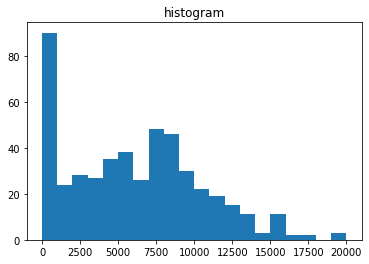

In [85]:
# Knowing the rough distributions of the data, you may have a idea how to design a histogram to see the details
# Now you can define the histogram as you know the rough range and step according to the mean and standard deviation you obtained above.
# Try to examine the statistical distribution of other columns.

my_bin = list(np.arange(start=0.0,stop=21000.0,step=1000))
plt.hist(pop1000, bins = my_bin) 
plt.title("histogram") 
plt.show()

### Short exercise 5.1

Now recall what you have been experimented with in section 0, and try to fit simple linear models between anyone of variables and the NO2 data.

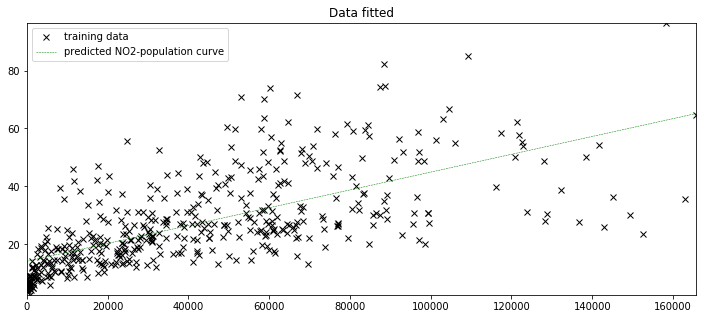

In [99]:
# Answers and hints
# Define a function to fit a linear model to the dummy data.
def fit(x, y):
    # x : (N, D) np.ndarray
    # y : (N,) np.ndarray
    # Linear fit means a linear model in the form of M(x) = θ1 + θ2x is assumed
    # Or, in the form of matrix multiplication M(X) = θ'X, where
    # X is referred as designed vector/matrix in the form of [1, x]' and θ is [θ1, θ2]'
    X_mat=np.hstack((np.ones(len(x)).reshape(-1,1), x))  # X_mat is a designed matrix
    
    # Given the observed data y, a proper solution of θ to M(x) can be: θ* = argmin (||y - X @ θ||^2_2)
    theta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)  # If you see an @ in the middle of a line, that's matrix multiplication.
    var = np.mean(np.square(X_mat @ theta - y))
    return theta, var

def predict(x, theta, var, return_std:bool=False):
    X_mat=np.hstack((np.ones(len(x)).reshape(-1,1), x))  # X_mat is a designed matrix
    y = X_mat @ theta
    if return_std:
        y_std = np.sqrt(var) + np.zeros_like(y)
        return y, y_std
    return y

column_name = 'population_3000m'  # Select data column
weights, variance = fit(data_all[column_name].values.reshape(-1,1), data_all['weekday_daytime_no2'].values)

x_all = np.linspace(data_all[column_name].values.min(), data_all[column_name].values.max(), 500).reshape(-1,1)
no2_predict = predict(x_all, weights, variance)

plt.figure(figsize=(12,5))
plt.xlim([data_all[column_name].values.min(), data_all[column_name].values.max()])
plt.ylim([data_all['weekday_daytime_no2'].values.min(), data_all['weekday_daytime_no2'].values.max()])
plt.title('Data fitted')
plt.plot(data_all[column_name].values, data_all['weekday_daytime_no2'].values,'kx',label='training data')
plt.plot(x_all, no2_predict, '--g', linewidth=.5, label='predicted NO2-population curve')
plt.legend()

In [11]:
# Try to further explore how each variable correlates to the NO2

### Short exercise 5.2

Recall linear regression examples in section 1. Please implement **regression** between NO<sub>2</sub> and population as well as road network configuration. Compare how your model perform by using the **training** and **validation/test** manner. Try to interpret the figure plotted.

In the below example, all **variables** are used for a **regularized** regression. You can start your experiment by using one or few of them.

C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\Jon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Jon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20413.604373869435, tolerance: 8.402106069964669
  positive)


Text(0, 0.5, 'RMSE')

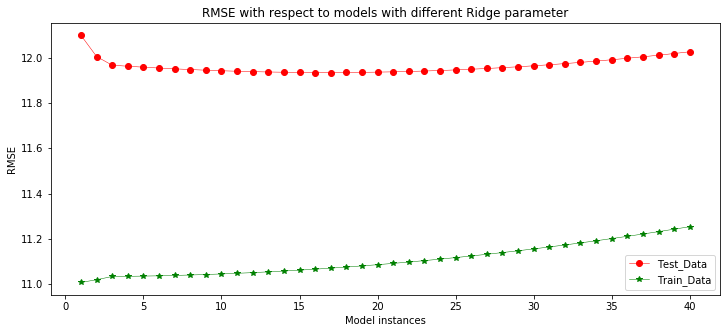

In [98]:
# This time, try to use all modules from sklearn for data preparation
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Extract all independent variables/features
x = data_all.iloc[:,5:].values
# Daytime NO2 as the dependent variable, here you use daytime NO2, but also try to experiment with nighttime values.
y = data_all['weekday_daytime_no2'].values.reshape(-1,1)  # Different way of extraction: column name vs. '.iloc'

# Prepare training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

# As the input variables are with very large range, from 10^2~10^4, it is better to standardize the data before using
# Standardize the independent variables by using the Sklearn functionality
sc = StandardScaler()  # Initiate data standardization functionality
x_train = sc.fit_transform(x_train)  # Standardize both training and test sets for the independent variables
x_test = sc.transform(x_test)

# Inspect 
RMSE_test = []
RMSE_train = []
for i in range(0, 200, 5):
    # Configure model with different regularization parameter
    # Also try to experiment with Ridge regression
    model = Lasso(alpha=i/100)
    # Then, fit this model to the data.
    model.fit(x_train, y_train)
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

# Plot model performance with different regularization parameter
plt.figure(figsize=(12,5))
plt.plot(range(1,len(RMSE_test)+1), RMSE_test,'-or', linewidth=.5, label='Test_Data')
plt.plot(range(1,len(RMSE_train)+1), RMSE_train, '-*g', linewidth=.5, label='Train_Data')
plt.legend()
plt.title('RMSE with respect to models with different Ridge parameter')
plt.xlabel('Model instances')
plt.ylabel('RMSE')

In [51]:
y

array([[15.48644693],
       [14.69732734],
       [28.57706396],
       [31.3352681 ],
       [23.67773975],
       [36.30109783],
       [36.00998068],
       [28.07641535],
       [18.47430598],
       [27.31049669],
       [32.05178106],
       [40.4343543 ],
       [19.15116047],
       [48.92342018],
       [32.85631433],
       [45.85299501],
       [29.48129697],
       [14.54389012],
       [18.9024395 ],
       [42.92516593],
       [28.82524627],
       [18.50605114],
       [30.95089079],
       [24.42758087],
       [24.99640669],
       [20.21195986],
       [24.41595265],
       [26.90067797],
       [31.34852778],
       [24.34578057],
       [22.21430556],
       [22.66009096],
       [37.61537543],
       [31.82875872],
       [16.62744419],
       [50.11016329],
       [48.76465662],
       [27.57393617],
       [53.83641907],
       [39.78323619],
       [38.6723973 ],
       [31.33448753],
       [17.95289773],
       [25.45340402],
       [35.54257318],
       [24

In [64]:
# Try to experiment with Ridge with differrent regularization parameter.

### Short exercise 5.2

Now please implement the **Decision Tree** and **Random Forest** algorithms and apply them to the NO<sub>2</sub> **regression** task. Fine-tune the model parameters such as the tree depth and number of trees to see how the models perform in comparison to the above *more conventional* **regression** approaches. And which **variable**/**feature** is the most important one for tree/forest based approaches?

In [109]:
# You will utilize the Random Forest module provided by the 'Sklearn'
# There are also many preprocessing modules provided in 'Sklearn', such as split dataset for training and validation/testing

from sklearn.model_selection import train_test_split

# First extract all independent variables/features
x = data_all.iloc[:,5:].values
# Daytime NO2 as the dependent variable
y = data_all['weekday_daytime_no2'].values.reshape(-1,1)  # Different way of extraction: column name vs. '.iloc'

# Split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [124]:
# Randome Forest regression

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)

C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [125]:
# Model evaluation

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.91222223206947
Mean Squared Error: 156.98003682422336
Root Mean Squared Error: 12.529167443378805


Feature: 0, Score: 0.26104
Feature: 1, Score: 0.25811
Feature: 2, Score: 0.08365
Feature: 3, Score: 0.07454
Feature: 4, Score: 0.23377
Feature: 5, Score: 0.08890


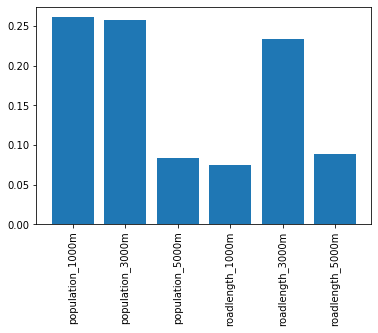

In [126]:
# Variable/feature importance

importance = model_rf.feature_importances_
# summarize feature importance
feature_name = data_all.columns[5:]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(feature_name, importance)
plt.xticks(rotation='vertical')
plt.show()

As you have already noticed in *section 5.0*, data within different columns of the original dataset can be with significantly different distribution. If we again consider each **variable** as a **feature**, it means some **feature** may be quite *congested*, it is better to standardize **variables**/**features** to have all of them on the same scale before feeding them into *machine learning* algorithms. Let's apply standardization this time to see if improvements can be achieved. How do you interpret the results?

In [129]:
# Hint: in 'Sklearn', there are also modules for you to preprocessing your data, such as standardization.
# And training/validation split.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# First extract all independent variables/features
x = data_all.iloc[:,5:].values
# Daytime NO2 as the dependent variable
y = data_all['weekday_daytime_no2'].values.reshape(-1,1)  # Different way of extraction: column name vs. '.iloc'

# Split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Standardize the independent variables
sc = StandardScaler()  # Initiate data standardization functionality
x_train = sc.fit_transform(x_train)  # Standardize both training and test sets for the independent variables
x_test = sc.transform(x_test)

# Randome Forest regression

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)

C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [130]:
# Model evaluation

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.737450388886492
Mean Squared Error: 153.9796378196721
Root Mean Squared Error: 12.408853203244533


Feature: 0, Score: 0.22008
Feature: 1, Score: 0.23033
Feature: 2, Score: 0.07785
Feature: 3, Score: 0.07271
Feature: 4, Score: 0.31706
Feature: 5, Score: 0.08198


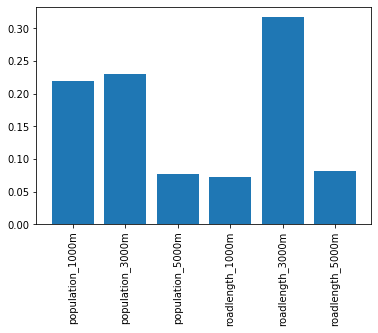

In [131]:
# Variable/feature importance

importance = model_rf.feature_importances_
# summarize feature importance
feature_name = data_all.columns[5:]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(feature_name, importance)
plt.xticks(rotation='vertical')
plt.show()